In [ ]:
!pip install cohere==4.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
import cohere
import numpy as np
import seaborn as sns

api_key = '' # Paste your API key here. This is a trial key. These are free from Cohere.
co = cohere.Client(api_key)

## Turn text into embeddings

In [ ]:
oranges = np.array(co.embed(["oranges"], model="large").embeddings)
lemons = np.array(co.embed(["lemons"], model="large").embeddings)
limes = np.array(co.embed(["limes"], model="large").embeddings)
key_limes = np.array(co.embed(["key_limes"], model="large").embeddings)
tangerines = np.array(co.embed(["tangerines"], model="large").embeddings)
pineapples = np.array(co.embed(["pineapples"], model="large").embeddings)
mangoes = np.array(co.embed(["mangoes"], model="large").embeddings)
papayas = np.array(co.embed(["papayas"], model="large").embeddings)
kiwis = np.array(co.embed(["kiwis"], model="large").embeddings)
guavas = np.array(co.embed(["guavas"], model="large").embeddings)


In [ ]:
oranges

array([[-1.6855469 , -2.0820312 ,  2.1914062 , ...,  1.6699219 ,
         0.5576172 ,  0.19299316]])

In [ ]:
len(oranges[0])

4096

## Calculate dot products

- lemons
- limes
- kiwis

In [ ]:
from numpy import dot
print("Similarity between lemons and limes:", dot(lemons[0], limes[0]))
print("Similarity between lemons and kiwis:", dot(lemons[0], kiwis[0]))
print("Similarity between limes and kiwis:", dot(limes[0], kiwis[0]))

Similarity between lemons and limes: 6950.971011710139
Similarity between lemons and kiwis: 4482.204396531939
Similarity between limes and kiwis: 4508.959219320356


## Calculate cosine similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between lemons and limes:", cosine_similarity(lemons, limes)[0][0])
print("Cosine similarity between lemons and kiwis:", cosine_similarity(lemons, kiwis)[0][0])
print("Cosine similarity between limes and kiwis:", cosine_similarity(limes, kiwis)[0][0])

Cosine similarity between lemons and limes: 0.7707548944485144
Cosine similarity between lemons and kiwis: 0.506334924674642
Cosine similarity between limes and kiwis: 0.5065402051392838


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between lemons and lemons:", cosine_similarity(lemons, lemons)[0][0])
print("Cosine similarity between limes and limes:", cosine_similarity(limes, limes)[0][0])
print("Cosine similarity between kiwis and kiwis:", cosine_similarity(kiwis, kiwis)[0][0])

Cosine similarity between lemons and lemons: 1.0
Cosine similarity between limes and limes: 1.0
Cosine similarity between kiwis and kiwis: 0.9999999999999997


[Text(0.5, 0, 'lemons'), Text(1.5, 0, 'limes'), Text(2.5, 0, 'kiwis')]

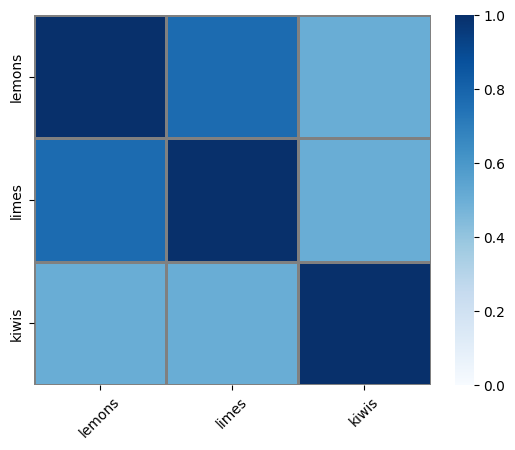

In [ ]:
embeddings = [lemons, limes, kiwis]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Blues",
                 linewidths=1, linecolor='grey',
                 xticklabels=["lemons", "limes", "kiwis"],
                 yticklabels=["lemons", "limes", "kiwis"],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


## Calculate cosine similarities for sentences

In [ ]:
lemons = "Lemons are rich in vitamin C"
limes = "Limes are tangy and acidic"
jordan = "Michael Jordan played for the Chicago bulls"

lemons_emb = np.array(co.embed([lemons], model="large").embeddings)
limes_emb = np.array(co.embed([limes], model="large").embeddings)
jordan_emb = np.array(co.embed([jordan], model="large").embeddings)

In [ ]:
len(lemons_emb[0])

4096

[Text(0.5, 0, 'Lemons are rich in vitamin C'),
 Text(1.5, 0, 'Limes are tangy and acidic'),
 Text(2.5, 0, 'Michael Jordan played for the Chicago bulls')]

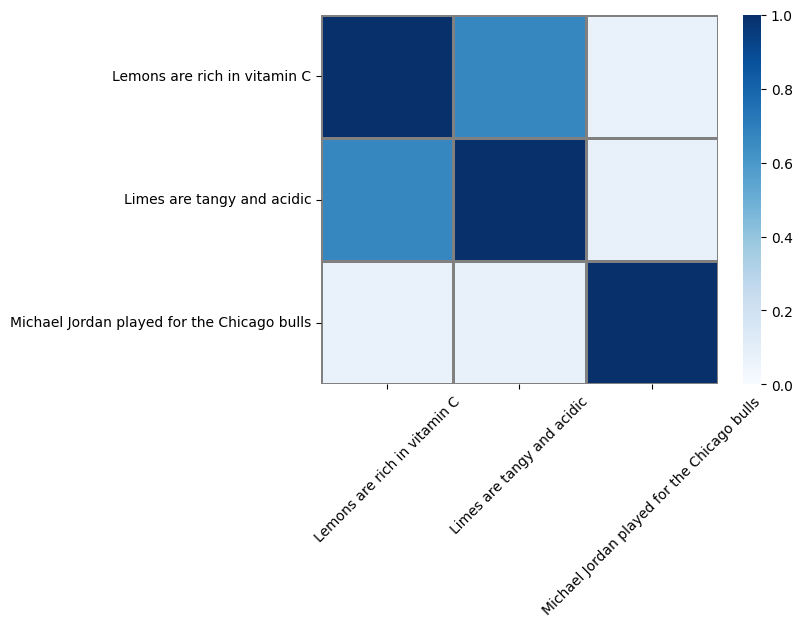

In [ ]:
embeddings = [lemons_emb, limes_emb, jordan_emb]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Blues",
                 linewidths=1, linecolor='grey',
                 xticklabels=[lemons, limes, jordan],
                 yticklabels=[lemons, limes, jordan],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)